In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## YOLOV4 分3種尺寸辨識
* 320*320 精準度低 速度快
* 416*416 精準度中 速度中
* 608*608 精準度高 速度慢

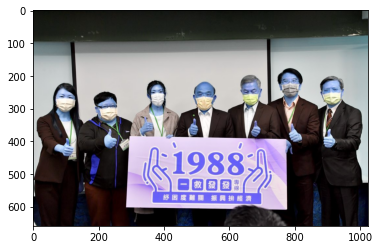

In [160]:
img = cv2.imread('./test2.jpg')
plt.imshow(img)
plt.show()

In [161]:
CONFIDENCE_THRESHOLD=0.3 #闊值
NMS_THRESHOLD=0.4 #消除重疊的框框
net = cv2.dnn.readNetFromDarknet("./cfg_mask/yolov4-tiny-custom.cfg" , "./cfg_mask/weights/yolov4-tiny-custom_last.weights")
model = cv2.dnn_DetectionModel(net)
model.setInputParams(size=(416, 416), scale=1/255, swapRB=True) #size請參照上方 , scale標準化 swapRB 有無需要轉RGB
classes, scores, boxes = model.detect(img, CONFIDENCE_THRESHOLD, NMS_THRESHOLD) #消除多於方框並輸出值


In [164]:
print('bandbox座標:',boxes)
print('分類:',classes)
print('精準度',scores)

bandbox座標: [[206 281  57  61]
 [892 233  50  57]
 [366 234  44  64]
 [ 80 253  54  59]
 [643 227  53  74]
 [504 242  52  68]
 [766 208  47  56]]
分類: [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
精準度 [[0.9959177 ]
 [0.99506557]
 [0.9941735 ]
 [0.9909048 ]
 [0.9807721 ]
 [0.97449964]
 [0.85999435]]


In [165]:
#標籤
label = [line.strip() for line in open('./cfg_mask/obj.names')]
print(label)

['without_mask', 'with_mask']


In [166]:
colors = [(0,255,0) , (0,0,255)]
for i in range(len(boxes)):
    x , y , w ,h =boxes[i]
    class_int = int(classes[i])
    score = round(float(scores[i])*100 , 2)
    color = colors[class_int ]
    cv2.rectangle(img , (x , y) , (x+w , y+h) ,color,2)
    cv2.putText(img , str(label[class_int ]) , (x , y -15) , cv2.FONT_HERSHEY_COMPLEX , 1 , color , 2)
    cv2.putText(img , 'score:'+str(score)+'%' , (x , y - 35) , cv2.FONT_HERSHEY_COMPLEX , 1 , color , 2)
    

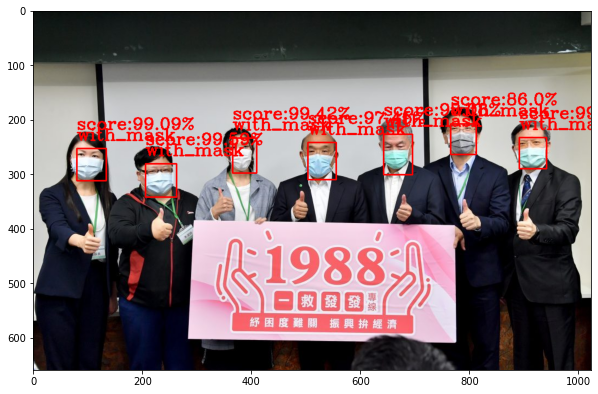

In [167]:
img =cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()